In [220]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt 
import seaborn as sns
from scipy import constants

In [221]:
df = pd.read_csv("worldometer_data.csv")

In [222]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [223]:
df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [224]:
df.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [226]:
df.describe().round(2)

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,209.00,4.00,188.00,3.0,205.00,3.00,205.00,122.00,208.00,187.00,191.00,191.00
mean,3.041549e+07,91718.50,1980.50,3792.59,300.0,58878.98,1706.00,27664.33,534.39,3196.02,98.68,1402404.70,83959.37
std,1.047661e+08,432586.68,3129.61,15487.18,451.2,256698.41,2154.78,174632.74,2047.52,5191.99,174.96,5553366.67,152730.59
min,8.010000e+02,10.00,20.00,1.00,1.0,7.00,42.00,0.00,1.00,3.00,0.08,61.00,4.00
25%,9.663140e+05,712.00,27.50,22.00,40.5,334.00,489.00,86.00,3.25,282.00,6.00,25752.00,8956.50
50%,7.041972e+06,4491.00,656.00,113.00,80.0,2178.00,936.00,899.00,27.50,1015.00,29.00,135702.00,32585.00
75%,2.575614e+07,36896.00,2609.00,786.00,449.5,20553.00,2538.00,7124.00,160.25,3841.75,98.00,757696.00,92154.50
max,1.381345e+09,5032179.00,6590.00,162804.00,819.0,2576668.00,4140.00,2292707.00,18296.00,39922.00,1238.00,63139605.00,995282.00


In [227]:
df['Population']

0      3.311981e+08
1      2.127107e+08
2      1.381345e+09
3      1.459409e+08
4      5.938157e+07
           ...     
204    4.992000e+03
205    2.624700e+04
206    3.489000e+03
207    8.010000e+02
208    5.986820e+05
Name: Population, Length: 209, dtype: float64

In [228]:
df.Population[7]

19132514.0

In [229]:
df.Population.nunique()

208

In [230]:
df.Population.sum()

6326421290.0

In [231]:
df[['Population','TotalCases','TotalRecovered']].iloc[:20]


,Population,TotalCases,TotalRecovered
0,3.311981e+08,5032179,2576668.0
1,2.127107e+08,2917562,2047660.0
2,1.381345e+09,2025409,1377384.0
3,1.459409e+08,871894,676357.0
4,5.938157e+07,538184,387316.0
5,1.290662e+08,462690,308848.0
6,3.301632e+07,455409,310337.0
7,1.913251e+07,366671,340168.0
8,5.093626e+07,357710,192355.0
9,4.675665e+07,354530,NaN


In [232]:
df.loc[[7],["TotalRecovered"]]

,TotalRecovered
7,340168.0


In [233]:
df.drop(['TotalRecovered','TotalCases'],axis=1)

,Country/Region,Continent,Population,NewCases,TotalDeaths,NewDeaths,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,NaN,162804.0,NaN,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,NaN,98644.0,NaN,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,NaN,41638.0,NaN,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,NaN,14606.0,NaN,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,NaN,9604.0,NaN,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,NaN,1.0,NaN,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,NaN,NaN,NaN,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,NaN,NaN,NaN,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,NaN,NaN,NaN,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [234]:
df.drop([0])

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [235]:
df.drop(range(5))

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129066160.0,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,33016319.0,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,19132514.0,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,50936262.0,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,46756648.0,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [236]:
df.shape

(209, 16)

In [237]:
df.duplicated('TotalCases')

0      False
1      False
2      False
3      False
4      False
       ...  
204    False
205     True
206     True
207    False
208    False
Length: 209, dtype: bool

In [238]:
df.dropna()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129066160.0,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
28,Bolivia,South America,11688459.0,86423,1282.0,3465.0,80.0,27373.0,936.0,55585.0,71.0,7394.0,296.0,183583.0,15706.0,Americas
72,S. Korea,Asia,51273732.0,14519,20.0,303.0,1.0,13543.0,42.0,673.0,18.0,283.0,6.0,1613652.0,31471.0,WesternPacific


In [239]:
df.isna()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,True
205,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True
206,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True
207,False,False,False,False,True,True,True,False,True,False,True,False,True,True,True,False


In [240]:
df.fillna(0)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,0
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe


In [241]:
df.query("Continent in ['Population','TotalCases'] and TotalDeaths > 100")

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region


In [242]:
df.loc[:,"ActiveCases"].max()

2292707.0

In [243]:
df.sample(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
67,Australia,Australia/Oceania,25528864.0,19890,NaN,255.0,NaN,10941.0,NaN,8694.0,52.0,779.0,10.0,4631419.0,181419.0,WesternPacific
86,Tajikistan,Asia,9557468.0,7665,NaN,62.0,NaN,6443.0,NaN,1160.0,NaN,802.0,6.0,NaN,NaN,Europe
149,Chad,Africa,16467965.0,942,NaN,76.0,NaN,838.0,NaN,28.0,NaN,57.0,5.0,NaN,NaN,Africa
135,Uruguay,South America,3474956.0,1318,NaN,37.0,NaN,1079.0,NaN,202.0,2.0,379.0,11.0,126956.0,36535.0,Americas
34,Panama,North America,4321282.0,71418,NaN,1574.0,NaN,45658.0,NaN,24186.0,161.0,16527.0,364.0,240995.0,55769.0,Americas


In [244]:
df.sort_values("TotalCases",ascending=False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [245]:
df.rename(columns={"Country/Region":"desh"},inplace=True)
df


,desh,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [246]:
df.rename(columns={"Country/Region":"desh"},inplace=False)
df


,desh,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [247]:
df.rename(columns=lambda a:a.upper())

,DESH,CONTINENT,POPULATION,TOTALCASES,NEWCASES,TOTALDEATHS,NEWDEATHS,TOTALRECOVERED,NEWRECOVERED,ACTIVECASES,"SERIOUS,CRITICAL",TOT CASES/1M POP,DEATHS/1M POP,TOTALTESTS,TESTS/1M POP,WHO REGION
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [248]:
df.reindex(labels=["NewCases","Population","NewDeaths","TotalDeaths"],axis=1)

,NewCases,Population,NewDeaths,TotalDeaths
0,NaN,3.311981e+08,NaN,162804.0
1,NaN,2.127107e+08,NaN,98644.0
2,NaN,1.381345e+09,NaN,41638.0
3,NaN,1.459409e+08,NaN,14606.0
4,NaN,5.938157e+07,NaN,9604.0
...,...,...,...,...
204,NaN,4.992000e+03,NaN,1.0
205,NaN,2.624700e+04,NaN,NaN
206,NaN,3.489000e+03,NaN,NaN
207,NaN,8.010000e+02,NaN,NaN


In [249]:
df.reindex(['8',"7","4","1","0"],axis=0)

,desh,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
df.reset_index(drop="index")

,desh,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [251]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   desh              209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [252]:
df.pivot_table(index="TotalCases" , columns="Population", values="TotalDeaths",
               aggfunc='sum').head()

Population,8.010000e+02,3.489000e+03,4.992000e+03,2.624700e+04,3.369000e+04,3.393800e+04,3.813900e+04,3.872900e+04,3.876800e+04,3.927000e+04,...,1.264359e+08,1.290662e+08,1.459409e+08,1.648514e+08,2.066063e+08,2.127107e+08,2.212959e+08,2.738084e+08,3.311981e+08,1.381345e+09
TotalCases,,,,,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
df.pivot_table(index="desh",
               columns="Population",
               values="TotalDeaths",
               aggfunc=['min','max','mean']
               )

min                                         \
Population     4.992000e+03 3.393800e+04 3.813900e+04 3.872900e+04   
desh                                                                 
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   
Angola                  NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
Vietnam                 NaN          NaN          NaN          NaN   
Western Sahara          NaN          NaN          NaN          NaN   
Yemen                   NaN          NaN          NaN          NaN   
Zambia                  NaN          NaN          NaN          NaN   
Zimbabwe                NaN          NaN          NaN          NaN   

                                                                    \
Population     3.876800e+04 3.927000e+04 4.292400e+04 6.225400e+04   
desh                                                                 
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   
Angola                  NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
Vietnam                 NaN          NaN          NaN          NaN   
Western Sahara          NaN          NaN          NaN          NaN   
Yemen                   NaN          NaN          NaN          NaN   
Zambia                  NaN          NaN          NaN          NaN   
Zimbabwe                NaN          NaN          NaN          NaN   

                                          ...         mean               \
Population     6.579800e+04 7.727800e+04  ... 1.264359e+08 1.290662e+08   
desh                                      ...                             
Afghanistan             NaN          NaN  ...          NaN          NaN   
Albania                 NaN          NaN  ...          NaN          NaN   
Algeria                 NaN          NaN  ...          NaN          NaN   
Andorra                 NaN         52.0  ...          NaN          NaN   
Angola                  NaN          NaN  ...          NaN          NaN   
...                     ...          ...  ...          ...          ...   
Vietnam                 NaN          NaN  ...          NaN          NaN   
Western Sahara          NaN          NaN  ...          NaN          NaN   
Yemen                   NaN          NaN  ...          NaN          NaN   
Zambia                  NaN          NaN  ...          NaN          NaN   
Zimbabwe                NaN          NaN  ...          NaN          NaN   

                                                                    \
Population     1.459409e+08 1.648514e+08 2.066063e+08 2.127107e+08   
desh                                                                 
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   
Angola                  NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
Vietnam                 NaN          NaN          NaN          NaN   
Western Sahara          NaN          NaN          NaN          NaN   
Yemen                   NaN          NaN          NaN          NaN   
Zambia                  NaN          NaN          NaN          NaN   
Zimbabwe                NaN          NaN          NaN          NaN   

                              

In [254]:
df.pivot_table(index="desh",
               columns="Population",
               
               aggfunc=({'TotalRecovered':['sum','min','max']}))

TotalRecovered                                         \
                          max                                          
Population       8.010000e+02 3.489000e+03 4.992000e+03 2.624700e+04   
desh                                                                   
Afghanistan               NaN          NaN          NaN          NaN   
Albania                   NaN          NaN          NaN          NaN   
Algeria                   NaN          NaN          NaN          NaN   
Andorra                   NaN          NaN          NaN          NaN   
Angola                    NaN          NaN          NaN          NaN   
...                       ...          ...          ...          ...   
Vietnam                   NaN          NaN          NaN          NaN   
Western Sahara            NaN          NaN          NaN          NaN   
Yemen                     NaN          NaN          NaN          NaN   
Zambia                    NaN          NaN          NaN          NaN   
Zimbabwe                  NaN          NaN          NaN          NaN   

                                                                    \
                                                                     
Population     3.369000e+04 3.393800e+04 3.813900e+04 3.872900e+04   
desh                                                                 
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   
Angola                  NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
Vietnam                 NaN          NaN          NaN          NaN   
Western Sahara          NaN          NaN          NaN          NaN   
Yemen                   NaN          NaN          NaN          NaN   
Zambia                  NaN          NaN          NaN          NaN   
Zimbabwe                NaN          NaN          NaN          NaN   

                                          ...                            \
                                          ...          sum                
Population     3.876800e+04 3.927000e+04  ... 1.264359e+08 1.290662e+08   
desh                                      ...                             
Afghanistan             NaN          NaN  ...          NaN          NaN   
Albania                 NaN          NaN  ...          NaN          NaN   
Algeria                 NaN          NaN  ...          NaN          NaN   
Andorra                 NaN          NaN  ...          NaN          NaN   
Angola                  NaN          NaN  ...          NaN          NaN   
...                     ...          ...  ...          ...          ...   
Vietnam                 NaN          NaN  ...          NaN          NaN   
Western Sahara          NaN          NaN  ...          NaN          NaN   
Yemen                   NaN          NaN  ...          NaN          NaN   
Zambia                  NaN          NaN  ...          NaN          NaN   
Zimbabwe                NaN          NaN  ...          NaN          NaN   

                                                                    \
                                                                     
Population     1.459409e+08 1.648514e+08 2.066063e+08 2.127107e+08   
desh                                                                 
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   
Angola                  NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
Vietnam                 NaN          NaN          NaN    

In [255]:
df.pivot_table(index="desh",
               columns="Population",
               values="TotalDeaths",
               aggfunc=(min)).dropna()





Population,4.992000e+03,3.393800e+04,3.813900e+04,3.872900e+04,3.876800e+04,3.927000e+04,4.292400e+04,6.225400e+04,6.579800e+04,7.727800e+04,...,1.264359e+08,1.290662e+08,1.459409e+08,1.648514e+08,2.066063e+08,2.127107e+08,2.212959e+08,2.738084e+08,3.311981e+08,1.381345e+09
desh,,,,,,,,,,,,,,,,,,,,,


<module 'matplotlib.pyplot' from 'c:\\Users\\ISAK\\anaconda\\conda-meta\\AC\\Lib\\site-packages\\matplotlib\\pyplot.py'>


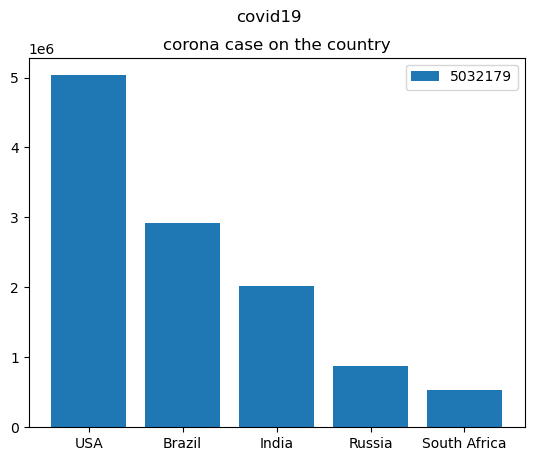

In [279]:
df_subset = df.head()
x = df_subset['TotalCases']
y = df_subset['desh']
plt.bar(y, x )
print(plt)
plt.suptitle('covid19')
plt.title('corona case on the country')
plt.legend(x)


In [257]:
df.columns

Index(['desh', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

<module 'matplotlib.pyplot' from 'c:\\Users\\ISAK\\anaconda\\conda-meta\\AC\\Lib\\site-packages\\matplotlib\\pyplot.py'>


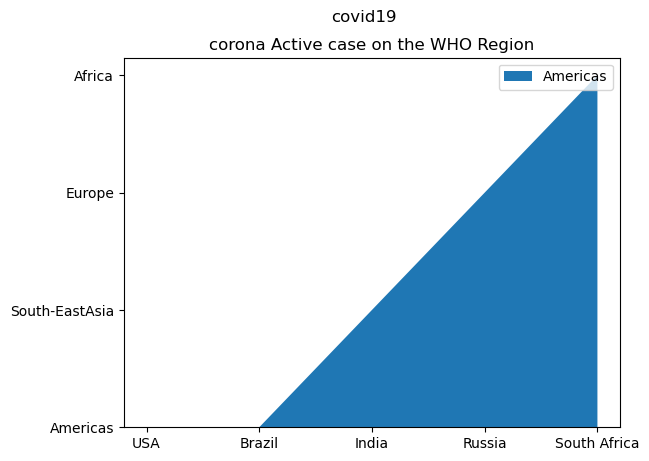

In [287]:
df_subset = df.head()
x = df_subset['WHO Region']
y = df_subset['desh']
plt.stackplot(y, x )
print(plt)
plt.suptitle('covid19')
plt.title('corona Active case on the WHO Region')
plt.legend(x)

<module 'matplotlib.pyplot' from 'c:\\Users\\ISAK\\anaconda\\conda-meta\\AC\\Lib\\site-packages\\matplotlib\\pyplot.py'>


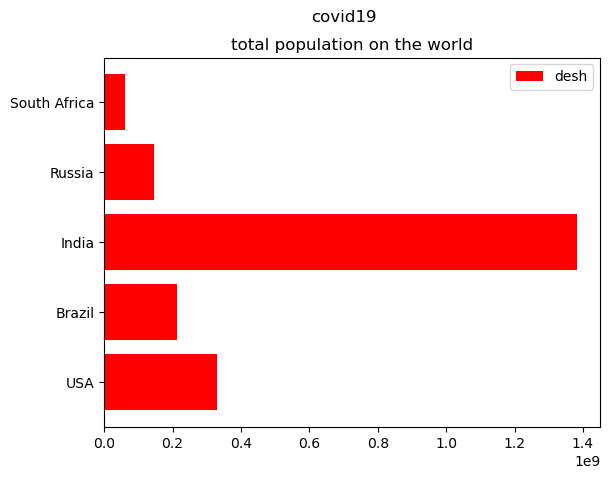

In [258]:
df_subset = df.head()
x = df_subset['desh']
y = df_subset['Population']
plt.barh(x,y,color="red")

plt.suptitle('covid19')
plt.title("total population on the world")
plt.legend(df)
print(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\ISAK\\anaconda\\conda-meta\\AC\\Lib\\site-packages\\matplotlib\\pyplot.py'>


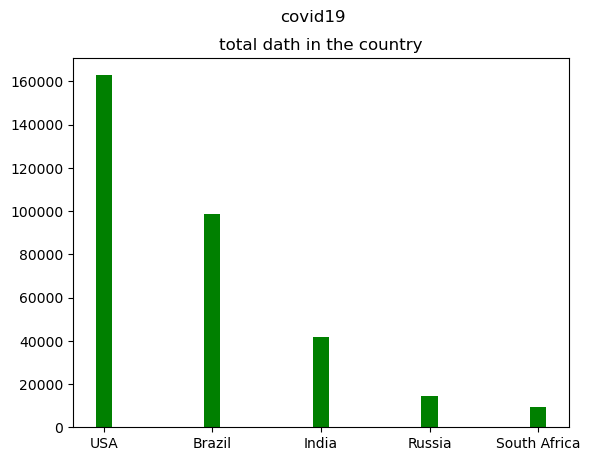

In [259]:
df_subset = df.head()
x = df_subset['desh']
y = df_subset['TotalDeaths']
plt.bar(x,y,color="green",width=0.15)
plt.suptitle('covid19')
plt.title("total dath in the country")
print(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\ISAK\\anaconda\\conda-meta\\AC\\Lib\\site-packages\\matplotlib\\pyplot.py'>


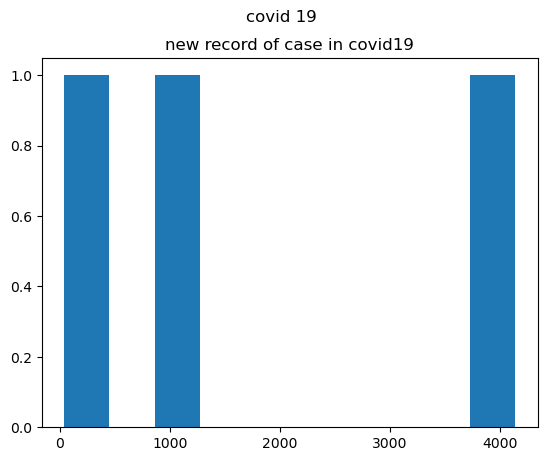

In [260]:
x = df['NewRecovered']
plt.hist(x)
plt.suptitle('covid 19')
plt.title("new record of case in covid19")
print(plt)





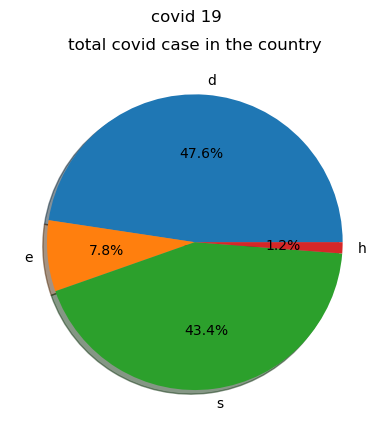

In [261]:
x = df['TotalCases'].groupby(df['desh']).sum().head(4)

plt.pie(x, labels='desh', autopct='%1.1f%%',shadow=True, )

plt.suptitle("covid 19")
plt.title("total covid case in the country")

plt.show()

In [262]:
df.head()

,desh,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


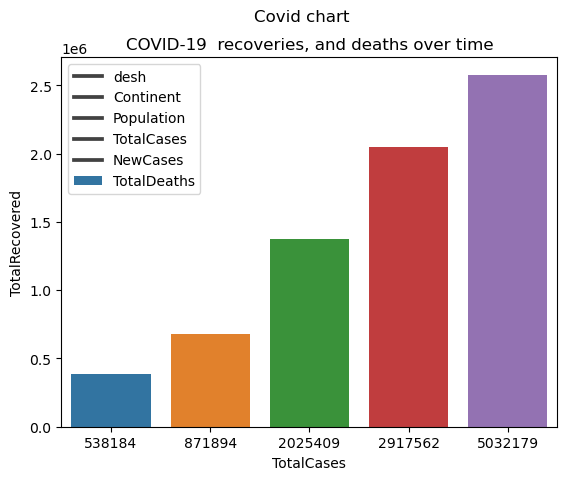

In [263]:

df_subset = df.head(5)
covid = df.groupby(['TotalCases']),(['TotalRecovered'])
sns.barplot(x ='TotalCases' , y = 'TotalRecovered' , data=df_subset )

plt.suptitle("Covid chart")
plt.title("COVID-19  recoveries, and deaths over time")
plt.legend(df)

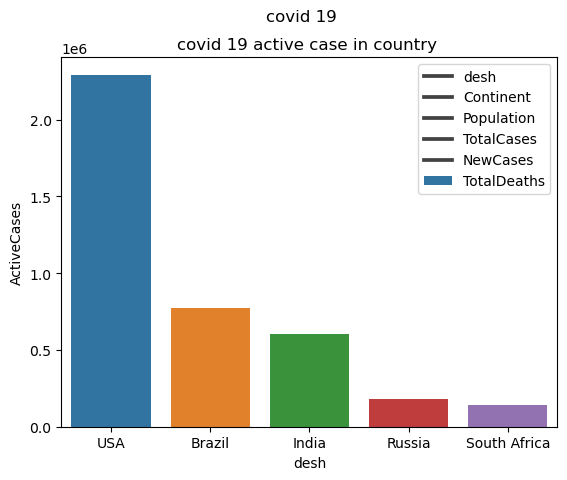

In [264]:
df_subset = df.head(5)
covid = df_subset.groupby(["desh"]),(["ActiveCases"])


sns.barplot(x='desh', y='ActiveCases' , data=df_subset)
plt.suptitle("covid 19")
plt.title("covid 19 active case in country ")
plt.legend(df)

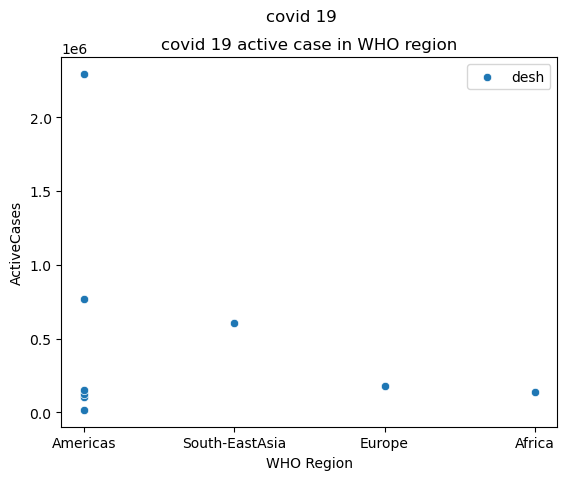

In [265]:
covid = df_subset = df.head(10).copy()
covid = df_subset.groupby(["WHO Region"]),(["ActiveCases"])


sns.scatterplot(x='WHO Region', y='ActiveCases' , data=df_subset)
plt.suptitle("covid 19")
plt.title("covid 19 active case in WHO region")
plt.legend(df_subset
           )

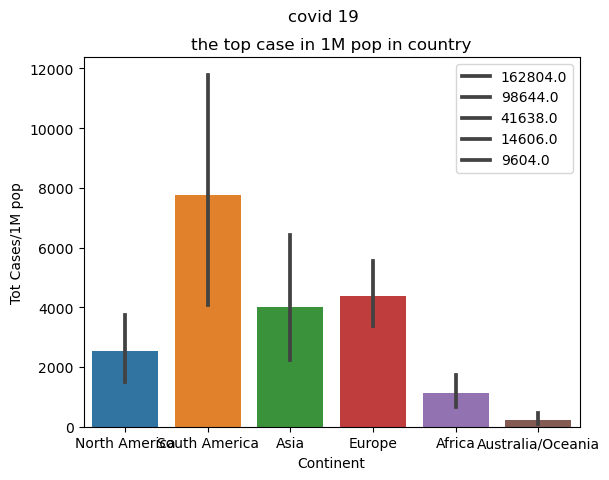

In [266]:
#Which continent has the highest number of total cases per 1 million population? Use a bar chart to compare the continents#
covid = df.groupby(['Continent']),(['Tot Cases/1M pop'])
sns.barplot(x='Continent' , y = 'Tot Cases/1M pop' ,data=df)

plt.suptitle("covid 19")
plt.title("the top case in 1M pop in country")
plt.legend(y)


In [267]:
df.columns

Index(['desh', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

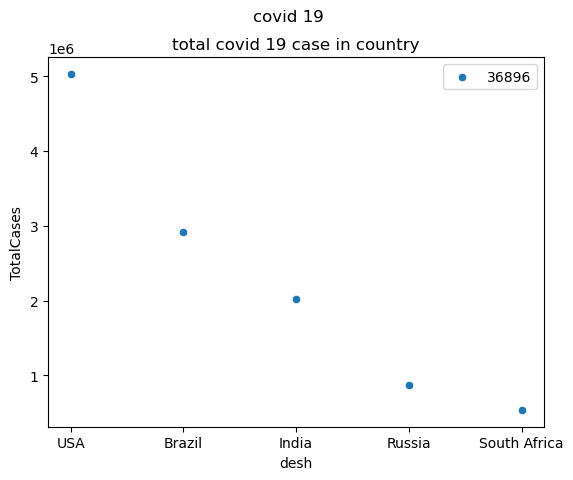

In [268]:
df_subset =df.head(5)
covid = df_subset.groupby(['TotalCases']),(['desh'])
sns.scatterplot(x='desh' , y ='TotalCases' ,data=df_subset)
plt.suptitle("covid 19")
plt.title("total covid 19 case in country")
plt.legend(x)



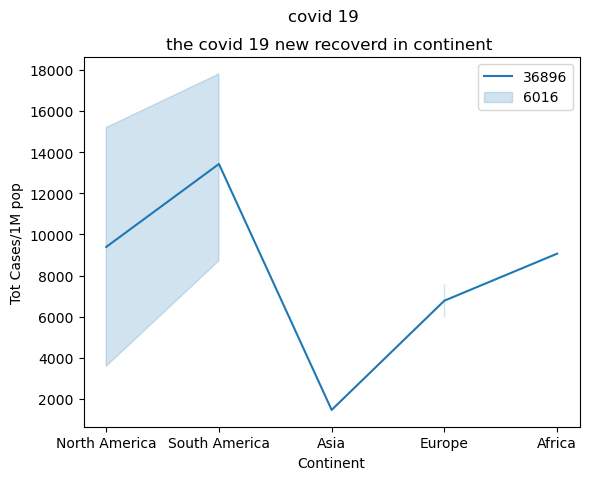

In [269]:
df_subset =df.head(10)
covid = df_subset.groupby(['Continent']),(['NewRecovered'])
sns.lineplot(x='Continent' , y = 'Tot Cases/1M pop' ,data=df_subset)
plt.suptitle("covid 19")
plt.title("the covid 19 new recoverd in continent ")
plt.legend(x)



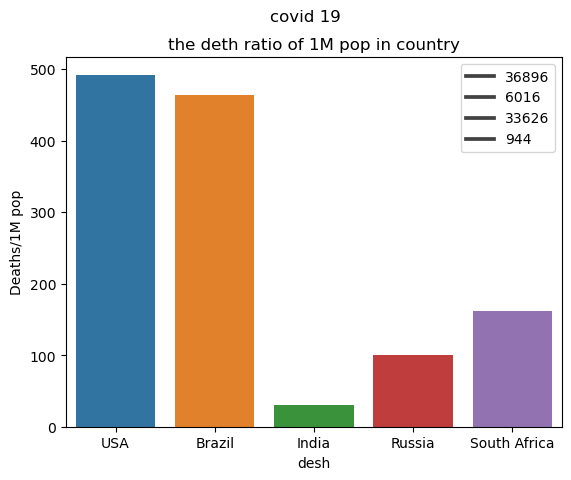

In [270]:
df_subset = df.head(5)
covid = df_subset.groupby(['desh']),(['Deaths/1M pop'])
sns.barplot(x='desh' , y = 'Deaths/1M pop' ,data=df_subset
            )
plt.suptitle("covid 19")
plt.title("the deth ratio of 1M pop in country")
plt.legend(x)


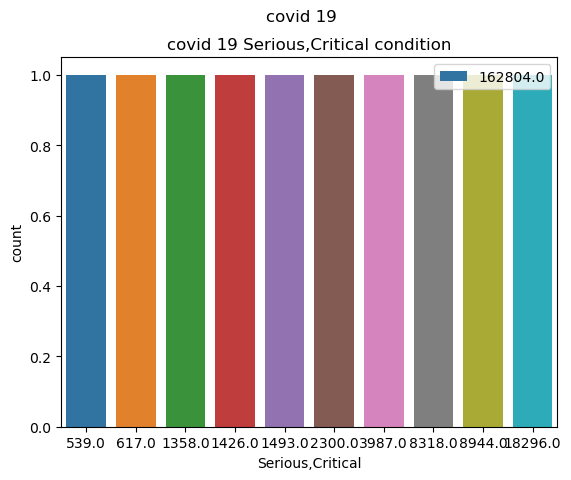

In [271]:
df_subset =df.head(10)
covid = df_subset.groupby(['Serious,Critical'])
sns.countplot(x='Serious,Critical' ,data=df_subset)

plt.suptitle("covid 19")
plt.title("covid 19 Serious,Critical condition")
plt.legend(y)


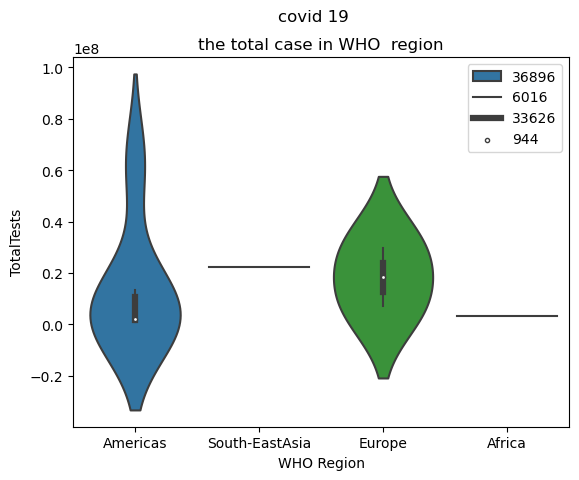

In [272]:
df_subset =df.head(10)
covid = df_subset.groupby(['WHO Region']),(['TotalTests'])
sns.violinplot(x='WHO Region' , y = 'TotalTests' ,data=df_subset)
plt.suptitle("covid 19")
plt.title("the total case in WHO  region")
plt.legend(x)


Text(0.5, 1.0, 'the total population and covid case')

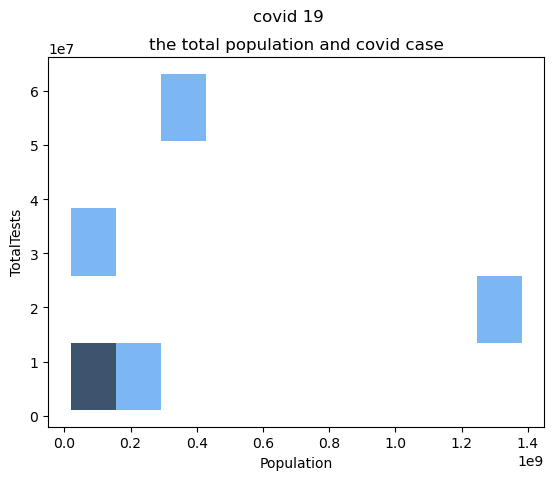

In [273]:
df_subset =df.head(10)
covid = df_subset.groupby(['Population']),(['TotalTests'])
sns.histplot(x='Population' , y = 'TotalTests' ,data=df_subset)
plt.suptitle("covid 19")
plt.title("the total population and covid case")



Text(0.5, 1.0, 'the top case in 1 M in the continent')

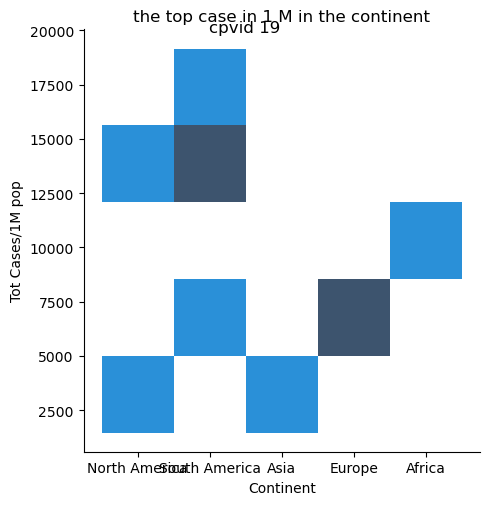

In [274]:
df_subset =df.head(10)
covid = df_subset.groupby(['Continent']),(['Tot Cases/1M pop'])
sns.displot(x='Continent' , y = 'Tot Cases/1M pop' ,data=df_subset)

plt.suptitle("cpvid 19")
plt.title("the top case in 1 M in the continent")



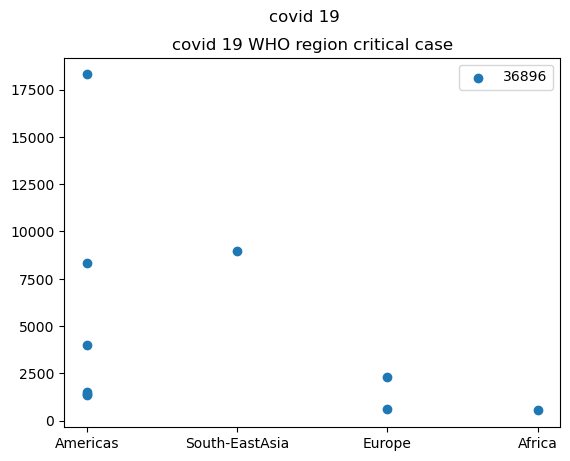

In [275]:
df_subset =df.head(10)
covid = df_subset.groupby(['WHO Region']),(['Serious,Critical'])
plt.scatter(x='WHO Region' , y = 'Serious,Critical' ,data=df_subset)

plt.suptitle("covid 19")
plt.title("covid 19 WHO region critical case")
plt.legend(x)


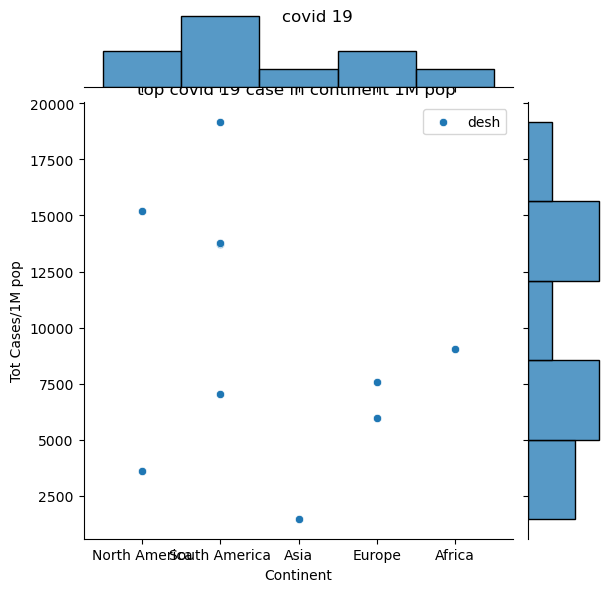

In [276]:
df_subset =df.head(10)
covid = df_subset.groupby(['Continent']),(['Tot Cases/1M pop'])
sns.jointplot(x='Continent' , y = 'Tot Cases/1M pop' ,data=df_subset)
plt.suptitle("covid 19")
plt.title("top covid 19 case in continent 1M pop ")
plt.legend(df)


In [277]:
# the most covid 19 case in USA , Brazil and India
# the most covid 19 activ case are USA , Brazil ans india.
# the most deth rate in asian region.
# the critical condition country are america and south east asia
# the fast new recovery country are north america and south america
